<a href="https://colab.research.google.com/github/Raisibe1/Father-s-day/blob/main/Q3_ITSCA_SUMMATIVE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Sentiment Analysis Result:
                                              Sentence Sentiment Status
0   It's a human sign when things go wrong, when t...         Negative
1   Into the boundary of each married man, sweet d...         Positive
2                                   Cold, cold heart.         Negative
3     Hard done by you, some things look better baby.         Positive
4   Just passing through, and it's no sacrifice, J...         Negative
5    It's two hearts living, in two separate worlds .         Negative
6   But it's no sacrifice, no sacrifice, it's no s...         Negative
7   Mutual misunderstanding after the fact, sensit...         Negative
8                In the final act, we lose direction.         Negative
9            No stone unturned, no tears to damn you.         Negative
10  When jealousy burns, cold, cold heart.Hard don...         Negative
11  Just passing through, and it's no sacrifice, J...         Negative
12   It's two hearts living, in two separate wor

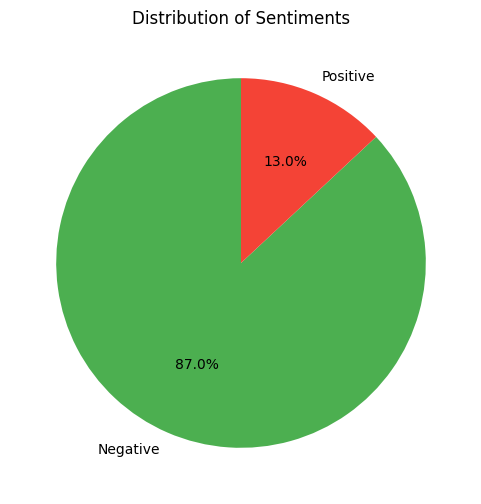

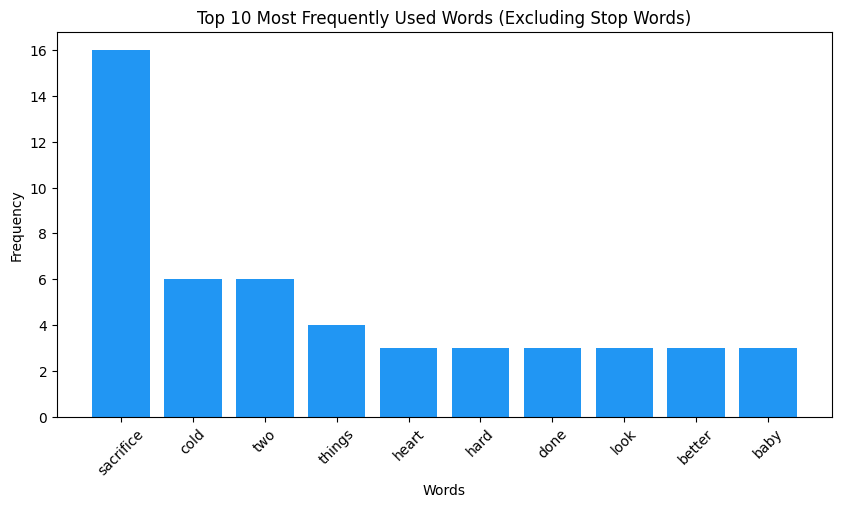

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
import re
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')

with open('elton_john_sacrifice.txt', 'r') as file:
    text = file.read()


blob = TextBlob(text)

results = []
for s in blob.sentences:
    polarity = s.sentiment.polarity
    status = 'Positive' if polarity > 0 else 'Negative'
    results.append({'Sentence': str(s), 'Sentiment Status': status})
sentiment_df = pd.DataFrame(results)

print("\nSentiment Analysis Result:\n", sentiment_df)


sentiment_counts = sentiment_df['Sentiment Status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=['#4CAF50', '#F44336'], startangle=90)
plt.title('Distribution of Sentiments')
plt.show()

stop_words = set(stopwords.words('english'))

words = re.findall(r'\b\w+\b', text.lower())
filtered_words = [w for w in words if w not in stop_words]

word_counts = Counter(filtered_words)
top_10_words = word_counts.most_common(10)

words, counts = zip(*top_10_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='#2196F3')
plt.title('Top 10 Most Frequently Used Words (Excluding Stop Words)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
